In [ ]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:

# Load the data from link
data_url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv'
data = pd.read_csv(data_url)

# Assuming the first column is the feature (X) and the second column is the target (y)
X = data.iloc[:, 0].values.reshape(-1, 1)  # Features
y = data.iloc[:, 1].values.reshape(-1, 1)  # Target


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Standardize data
#Subtracts mean and divides by the standard deviation
def standardize(data):
    mean = np.mean(data, axis=0)  #mean of each column
    std = np.std(data, axis=0)  #standard deviation of each column
    return (data - mean) / std

In [ ]:
#Error cost function
#mean squared error between the predicted values and the actual values
def calculate_error(m, b, points):
    total_error = 0  # Initialize total error as 0
    for i in range(len(points)):  # Iterate through each point in the data
        x = points[i, 0]  #x value (feature) from the point
        y = points[i, 1]  #y value (label) from the point
        # Calculate squared difference between the actual y value and the predicted y value (using the current m and b)
        total_error += (y - (m * x + b)) ** 2
    return total_error / float(len(points))

In [ ]:
#Gradient partial derivatives
#calculates the gradients of the error function with respect to m and b
def step_gradient(b_current, m_current, points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))  #number of points in the dataset
    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        #partial derivative of the error function w/h respect to b
        b_gradient += -(2 / N) * (y - ((m_current * x) + b_current))
        #partial derivative of the error function w/h respect to m
        m_gradient += -(2 / N) * x * (y - ((m_current * x) + b_current))
    # Update b and m by subtracting (learning rate * gradient)
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b, new_m]

In [ ]:
#Gradient descent
#iteratively applies step_gradient function to find the best parameters of b and m
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    error_graph = []  #make empty list to store error at iterations
    for i in range(num_iterations):  #num_iterations specifies how many times to iterate
        #single step of gradient descent, updating b and m
        b, m = step_gradient(b, m, np.array(points), learning_rate)
        #calculate and store error
        error_graph.append(calculate_error(m, b, points))
    return [b, m, error_graph]

In [ ]:
data_url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv'
data = pd.read_csv(data_url)

In [ ]:
student_marks = data.to_numpy()

initial_b = 0
initial_m = -0.5
learning_rate = 0.0001
num_iterations = 100
num_iterations_2000 = 2000

#100 iterations
b, m, error_graph = gradient_descent_runner(student_marks, initial_b, initial_m, learning_rate, num_iterations)

#2000 iterations
b_2000, m_2000, error_graph_2000 = gradient_descent_runner(student_marks, initial_b, initial_m, learning_rate, num_iterations_2000)


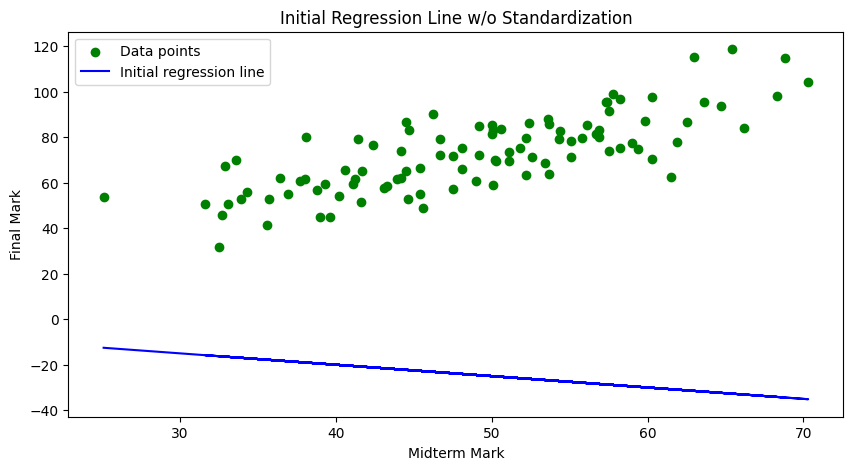

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(student_marks[:, 0], student_marks[:, 1], color='green', label='Data points')
plt.plot(student_marks[:, 0], initial_m * student_marks[:, 0] + initial_b, color='blue', label='Initial regression line')
plt.title('Initial Regression Line w/o Standardization')
plt.xlabel('Midterm Mark')
plt.ylabel('Final Mark')
plt.legend()
plt.show()

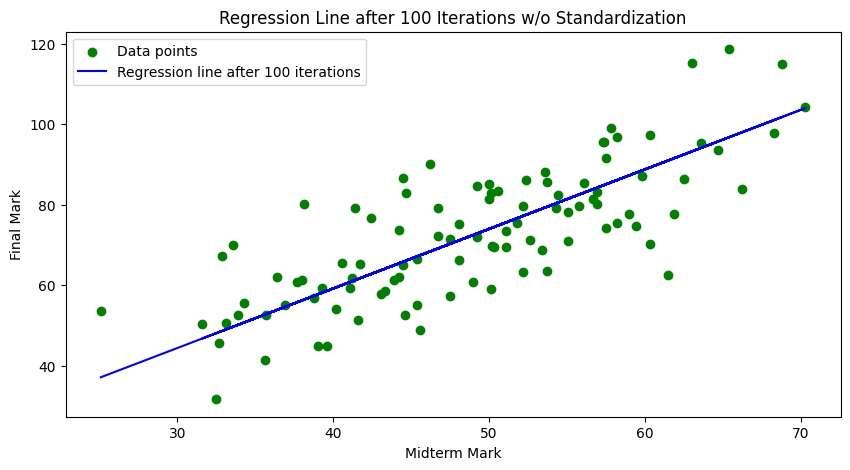

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(student_marks[:, 0], student_marks[:, 1], color='green', label='Data points')
plt.plot(student_marks[:, 0], m * student_marks[:, 0] + b, color='blue', label='Regression line after 100 iterations')
plt.title('Regression Line after 100 Iterations w/o Standardization')
plt.xlabel('Midterm Mark')
plt.ylabel('Final Mark')
plt.legend()
plt.show()

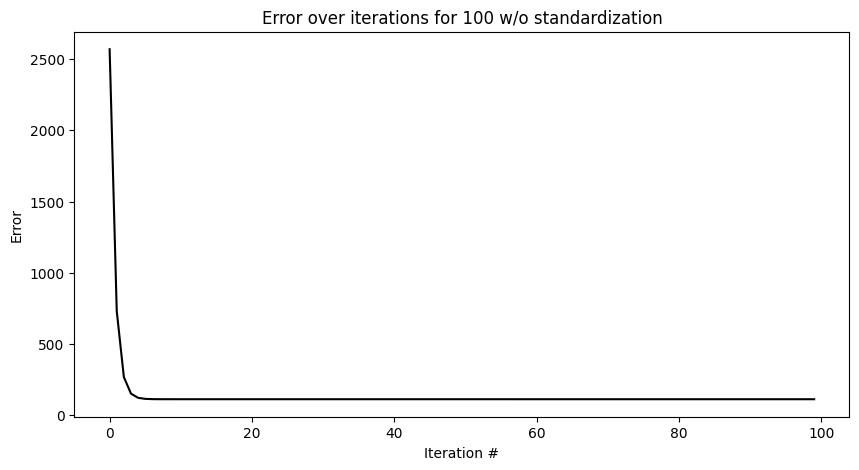

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(num_iterations), error_graph, color='black')
plt.title('Error over iterations for 100 w/o standardization')
plt.xlabel('Iteration #')
plt.ylabel('Error')
plt.show()

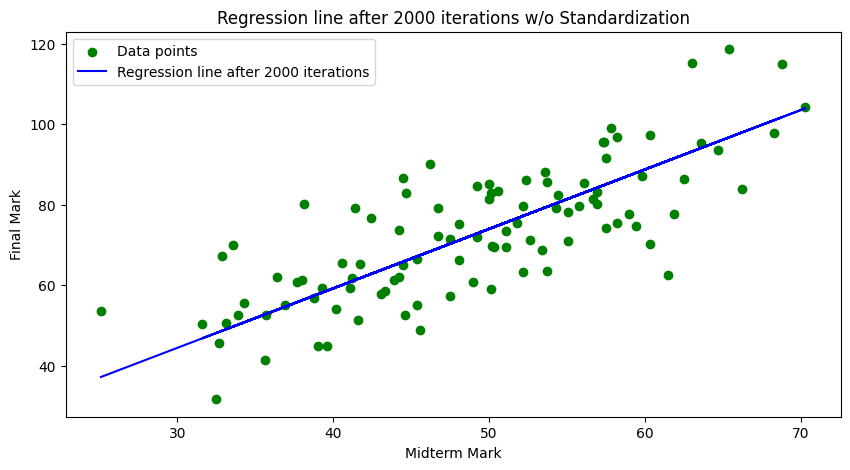

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(student_marks[:, 0], student_marks[:, 1], color='green', label='Data points')
plt.plot(student_marks[:, 0], m_2000 * student_marks[:, 0] + b_2000, color='blue', label='Regression line after 2000 iterations')
plt.title('Regression line after 2000 iterations w/o Standardization')
plt.xlabel('Midterm Mark')
plt.ylabel('Final Mark')
plt.legend()
plt.show()

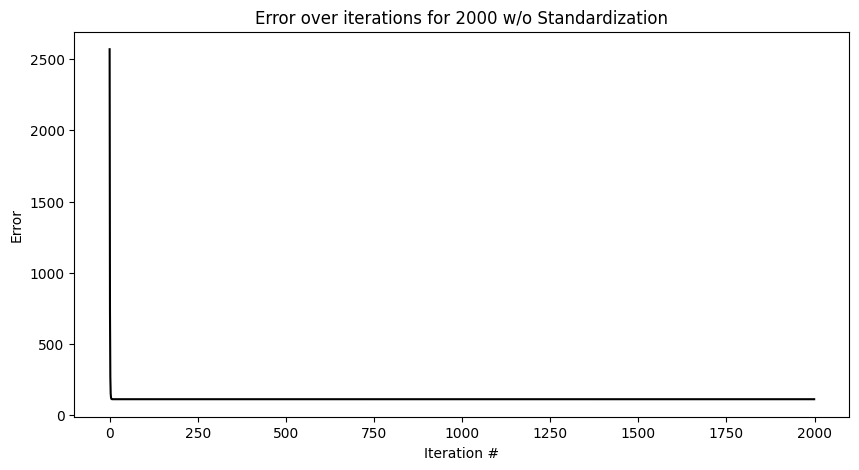

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(num_iterations_2000), error_graph_2000, color='black')
plt.title('Error over iterations for 2000 w/o Standardization')
plt.xlabel('Iteration #')
plt.ylabel('Error')
plt.show()

In [ ]:
# Standardize dataset
student_marks_standardized = standardize(student_marks)

b_std, m_std, error_graph_std = gradient_descent_runner(student_marks_standardized, initial_b, initial_m, learning_rate, num_iterations)

b_std_2000, m_std_2000, error_graph_std_2000 = gradient_descent_runner(student_marks_standardized, initial_b, initial_m, learning_rate, num_iterations_2000)

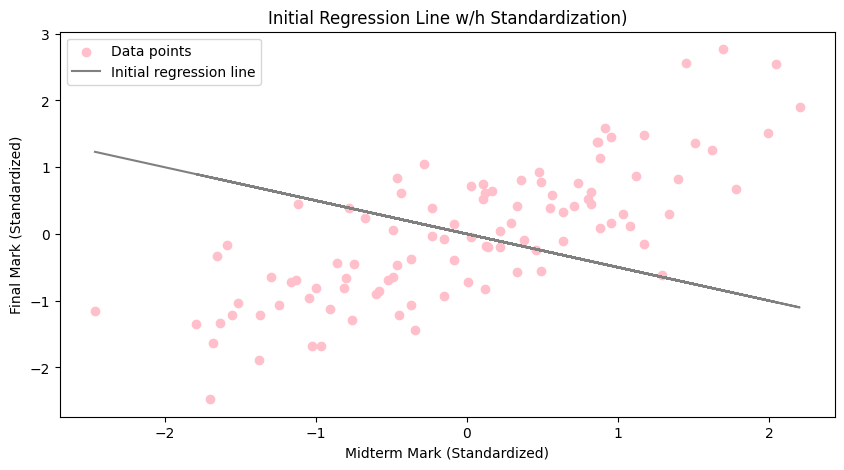

In [ ]:
# Plotting standardized dataset and initial regression line
plt.figure(figsize=(10, 5))
plt.scatter(student_marks_standardized[:, 0], student_marks_standardized[:, 1], color='pink', label='Data points')
plt.plot(student_marks_standardized[:, 0], initial_m * student_marks_standardized[:, 0] + initial_b, color='gray', label='Initial regression line')
plt.title('Initial Regression Line w/h Standardization)')
plt.xlabel('Midterm Mark (Standardized)')
plt.ylabel('Final Mark (Standardized)')
plt.legend()
plt.show()

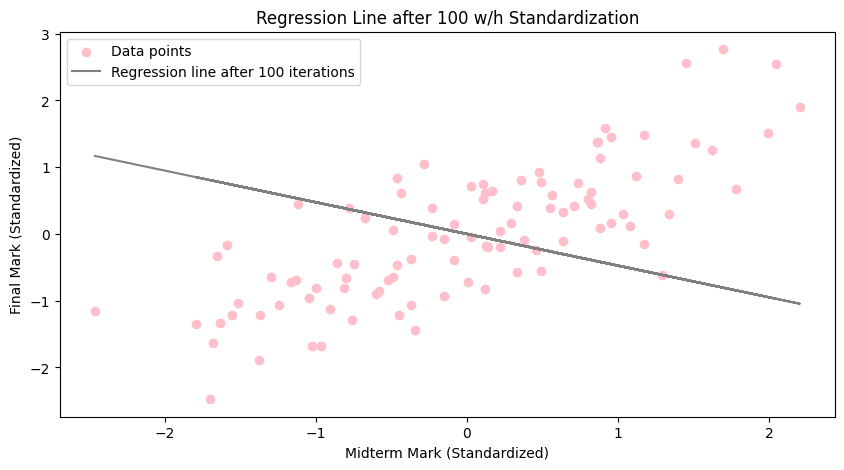

In [ ]:
# Plotting regression line after 100 iterations with standardized data
plt.figure(figsize=(10, 5))
plt.scatter(student_marks_standardized[:, 0], student_marks_standardized[:, 1], color='pink', label='Data points')
plt.plot(student_marks_standardized[:, 0], m_std * student_marks_standardized[:, 0] + b_std, color='gray', label='Regression line after 100 iterations')
plt.title('Regression Line after 100 w/h Standardization')
plt.xlabel('Midterm Mark (Standardized)')
plt.ylabel('Final Mark (Standardized)')
plt.legend()
plt.show()

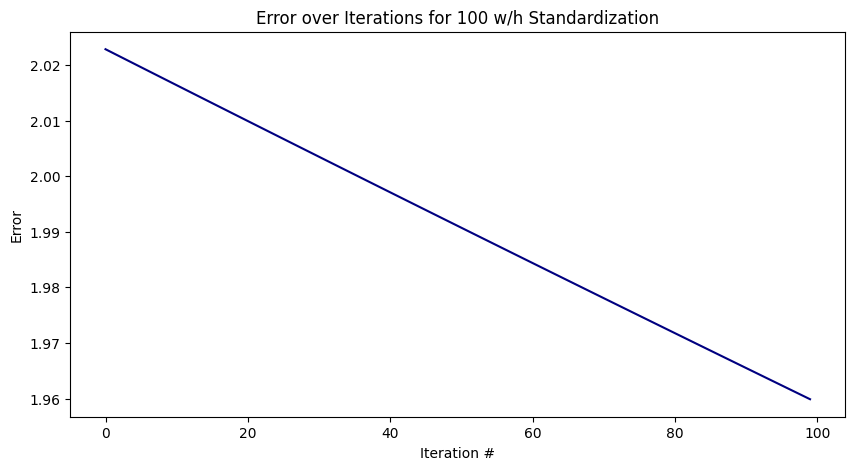

In [ ]:
# Plotting error over iterations (0 to 100) with standardized data
plt.figure(figsize=(10, 5))
plt.plot(range(num_iterations), error_graph_std, color='navy')
plt.title('Error over Iterations for 100 w/h Standardization')
plt.xlabel('Iteration #')
plt.ylabel('Error')
plt.show()


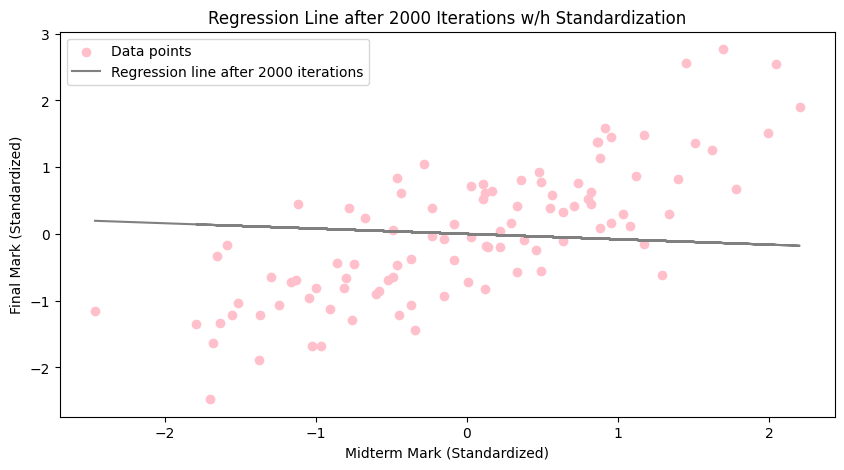

In [ ]:
#Regression line after 2000 iterations with standardized data
plt.figure(figsize=(10, 5))
plt.scatter(student_marks_standardized[:, 0], student_marks_standardized[:, 1], color='pink', label='Data points')
plt.plot(student_marks_standardized[:, 0], m_std_2000 * student_marks_standardized[:, 0] + b_std_2000, color='gray', label='Regression line after 2000 iterations')
plt.title('Regression Line after 2000 Iterations w/h Standardization')
plt.xlabel('Midterm Mark (Standardized)')
plt.ylabel('Final Mark (Standardized)')
plt.legend()
plt.show()

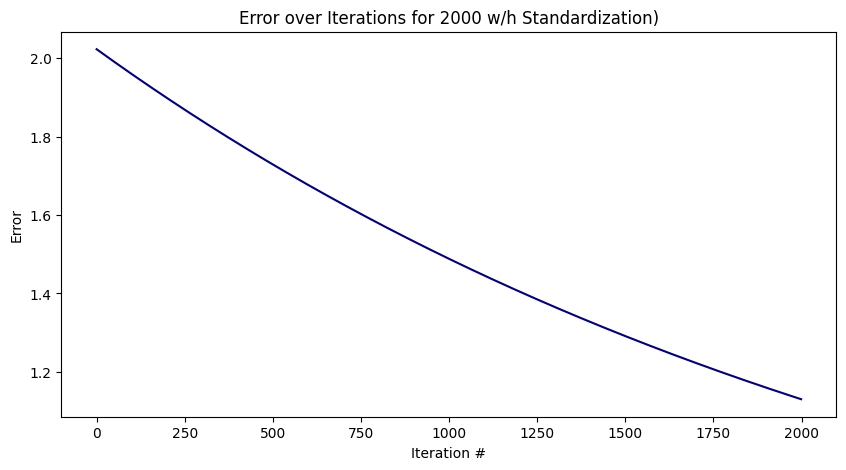

In [ ]:
#Error over iterations for 2000 with standardized data
plt.figure(figsize=(10, 5))
plt.plot(range(num_iterations_2000), error_graph_std_2000, color='navy')
plt.title('Error over Iterations for 2000 w/h Standardization)')
plt.xlabel('Iteration #')
plt.ylabel('Error')
plt.show()

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data from the provided CSV URL
data_url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv'
data = pd.read_csv(data_url)

X_train = data.iloc[:, 0].values.reshape(-1, 1)  # Features (Midterm mark)
y_train = data.iloc[:, 1].values  # Target variable (Final mark)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_
print('Slope:', slope)
print('Intercept:', intercept)

# Make predictions and calculate the mean squared error
predictions = model.predict(X_train)
mse = mean_squared_error(y_train, predictions)
print('Mean Squared Error:', mse)

Slope: 1.321992317252377
Intercept: 8.01157813964086
Mean Squared Error: 110.36460849324509
